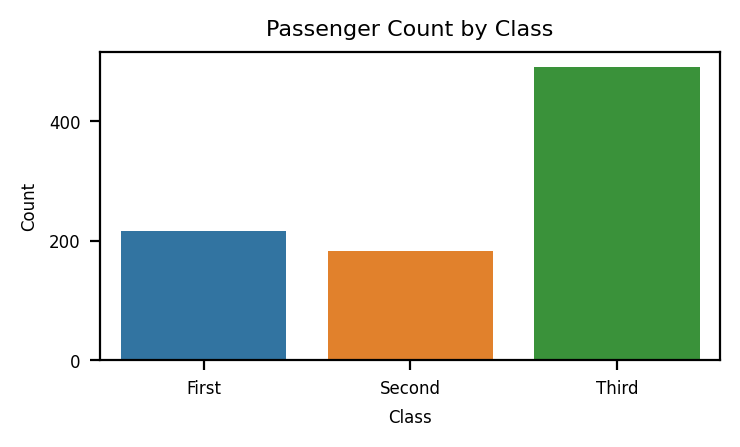

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = sns.load_dataset('titanic')

# Create a bar chart
plt.figure(figsize=(4,2), dpi=200)
sns.countplot(x='class', data=titanic)
plt.title('Passenger Count by Class', size=8)
plt.xlabel('Class', size=6)
plt.ylabel('Count', size=6)
plt.xticks(size=6)
plt.yticks(size=6)
plt.show()

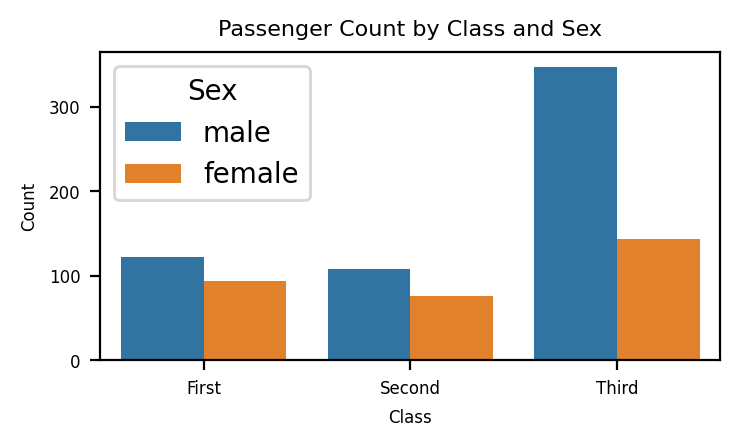

In [12]:
plt.figure(figsize=(4,2), dpi=200)
sns.countplot(x='class', hue='sex', data=titanic)

plt.title('Passenger Count by Class and Sex', size=8)
plt.xlabel('Class', size=6)
plt.ylabel('Count', size=6)
plt.legend(title='Sex')
plt.xticks(size=6)
plt.yticks(size=6)
plt.show()

<Figure size 800x400 with 0 Axes>

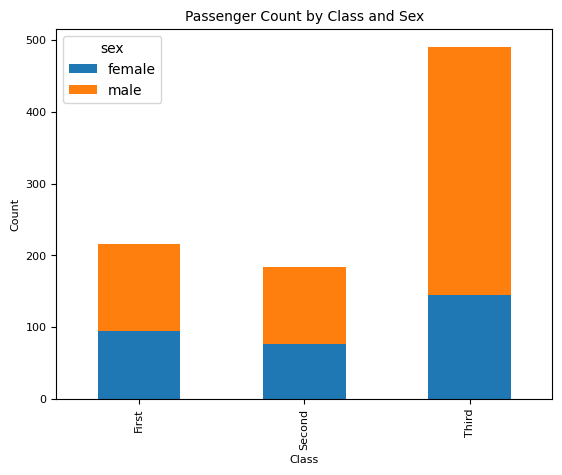

In [16]:
# Get counts of 'class' and 'sex'
class_sex_counts = titanic.groupby(['class', 'sex']).size().unstack()
plt.figure(figsize=(4,2), dpi=200)

# Create a stacked bar chart
class_sex_counts.plot(kind='bar', stacked=True)
plt.title('Passenger Count by Class and Sex', size=10)
plt.xlabel('Class', size=8)
plt.ylabel('Count', size=8)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

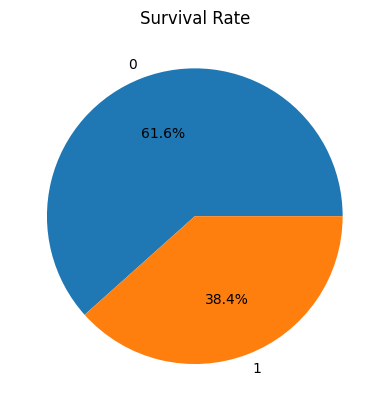

In [13]:
# Create a pie chart
plt.figure(figsize=(4,2), dpi=200)

titanic['survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Survival Rate')
plt.ylabel('')  # Hide y-label as it's not necessary for pie charts
plt.show()

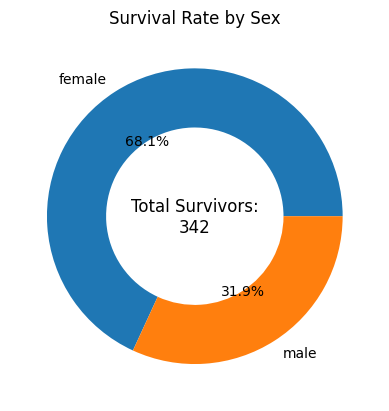

In [22]:
# Create a doughnut chart

survived = titanic[titanic['survived']==1]['sex'].value_counts()
plt.pie(survived, labels=survived.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title('Survival Rate by Sex')

# Add a text inside the doughnut
total = sum(survived)
plt.text(0, 0, f'Total Survivors:\n{total}', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.show()



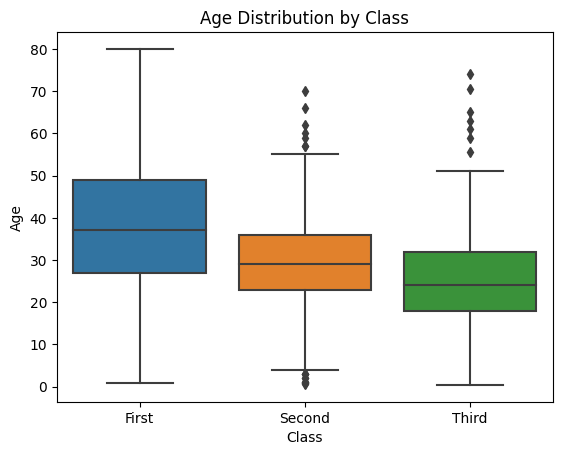

In [23]:
# Create a box plot
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


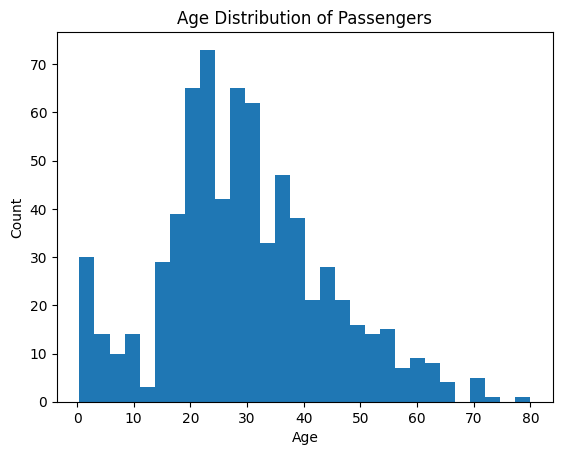

In [24]:
# Create a histogram
titanic['age'].plot.hist(bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


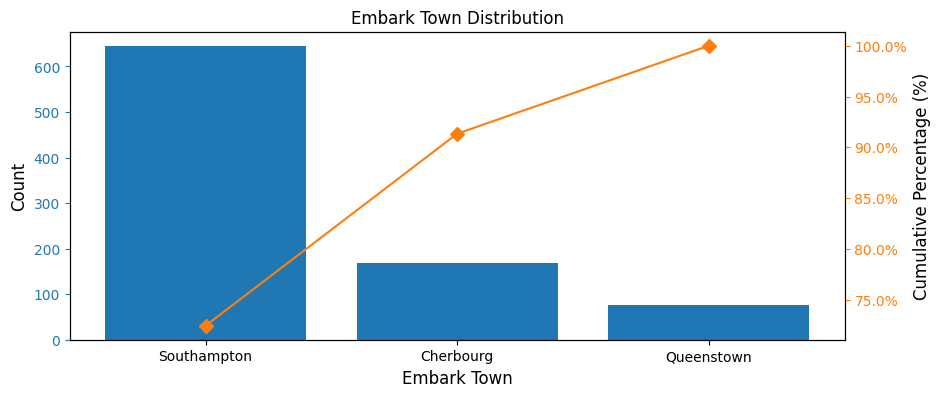

In [29]:
import numpy as np
from matplotlib.ticker import PercentFormatter

# Count the occurrence of each town
town_counts = titanic['embark_town'].value_counts().sort_values(ascending=False)

# Create DataFrame
df = pd.DataFrame({'town':town_counts.index, 'counts':town_counts.values})

# Calculate cumulative percentage
df["cumpercentage"] = df["counts"].cumsum()/df["counts"].sum()*100

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(df['town'], df['counts'], color="C0")
ax2 = ax.twinx()
ax2.plot(df['town'], df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Embark Town Distribution')
plt.xlabel('Embark Town')
plt.ylabel('Count')
ax2.set_ylabel('Cumulative Percentage (%)')
plt.xticks(rotation=45)

ax.set_xlabel('Embark Town', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)

plt.show()
